# Overview:
If we are planning on going out to see a movie, how well can we trust online reviews and ratings? Especially if the same company showing the rating also makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?


# Goal:
Our goal is to use our pandas and visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.

# Understanding the Background and Data
Article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](https://fivethirtyeight.com/features/fandango-movies-ratings/)


The Data:
This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](https://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Exploring Fandango Displayed Scores versus True User Ratings

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info

<bound method DataFrame.info of                                      FILM  STARS  RATING  VOTES
0             Fifty Shades of Grey (2015)    4.0     3.9  34846
1                   Jurassic World (2015)    4.5     4.5  34390
2                  American Sniper (2015)    5.0     4.8  34085
3                        Furious 7 (2015)    5.0     4.8  33538
4                       Inside Out (2015)    4.5     4.5  15749
..                                    ...    ...     ...    ...
499                      Valiyavan (2015)    0.0     0.0      0
500            WWE SummerSlam 2015 (2015)    0.0     0.0      0
501       Yagavarayinum Naa Kaakka (2015)    0.0     0.0      0
502  Yesterday, Today and Tomorrow (1964)    0.0     0.0      0
503                         Zarafa (2012)    0.0     0.0      0

[504 rows x 4 columns]>

In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


### A scatterplot showing the relationship between rating and votes.

Text(0, 0.5, 'VOTING')

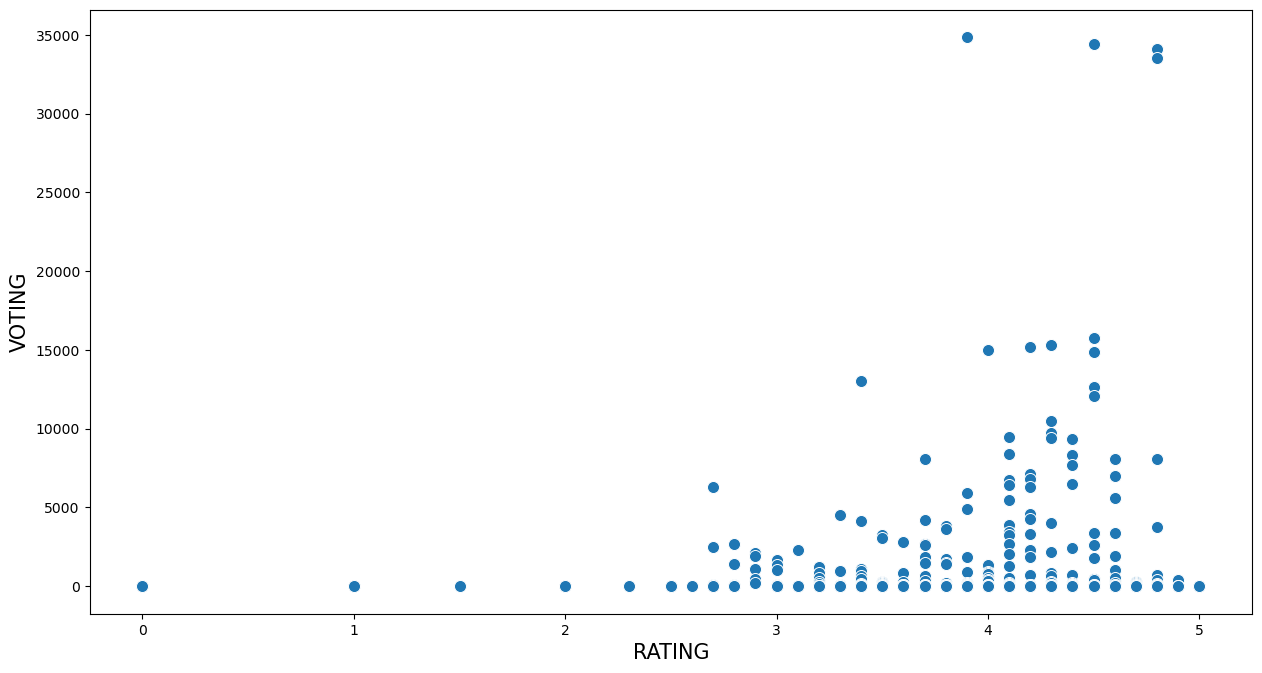

In [6]:
plt.figure(figsize=(15,8),dpi=100)
sns.scatterplot(data=fandango, x="RATING",y="VOTES",s=75);
plt.xlabel("RATING",fontsize=15)
plt.ylabel("VOTING",fontsize=15)

In [7]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [8]:
fandango["YEAR"] = fandango["FILM"].apply(lambda x: x.split()[-1][1:-1])


In [9]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [10]:
fandango["YEAR"].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

### Visualize the count of movies per year with a plot:

<AxesSubplot:xlabel='YEAR', ylabel='count'>

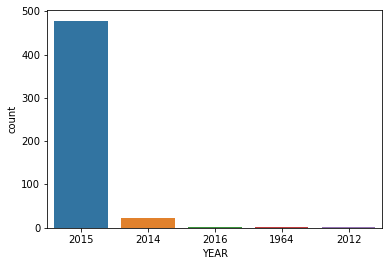

In [11]:
sns.countplot(x=fandango["YEAR"])

In [12]:
fandango.sort_values("VOTES",ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [13]:
len(fandango[fandango["VOTES"] == 0])

69

### Creating DataFrame of only reviewed films by removing any films that have zero votes.

In [14]:
fandango = fandango[fandango["VOTES"] != 0]

### Creating a KDE plot that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). 

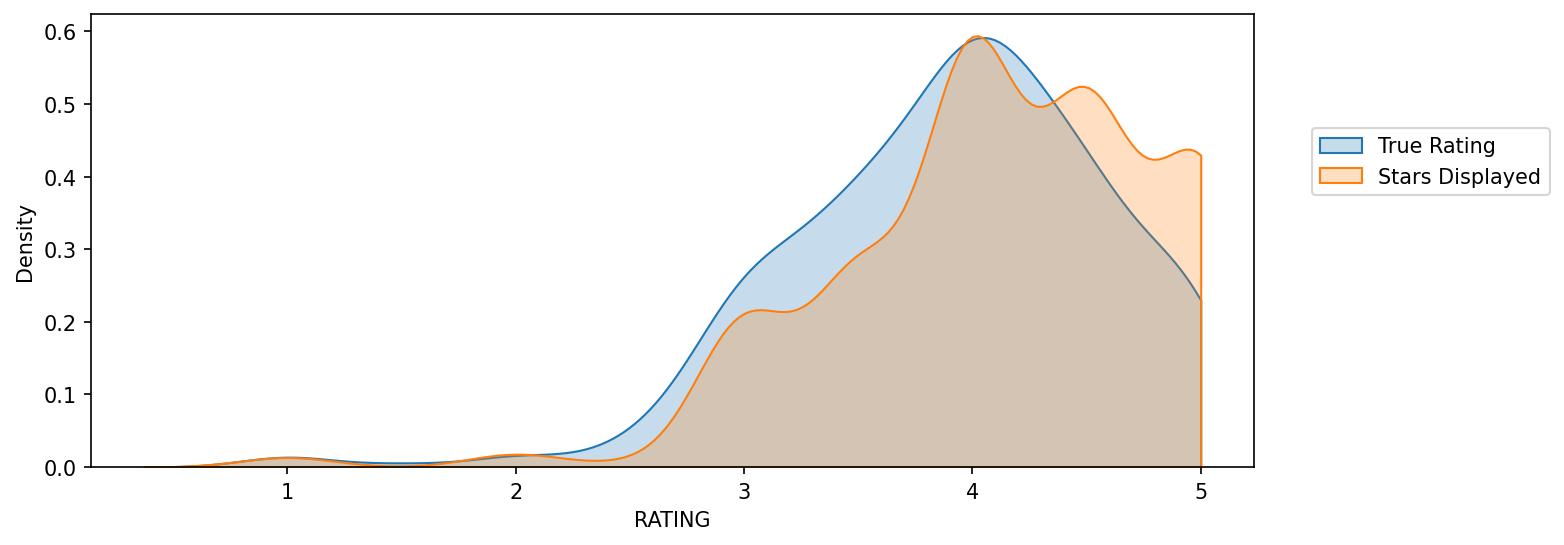

In [15]:
plt.figure(figsize=(10,4), dpi=150)
sns.kdeplot(data=fandango,x="RATING",shade=True,clip=[0,5],label="True Rating")
sns.kdeplot(data=fandango,x="STARS",shade=True,clip=[0,5],label="Stars Displayed")
plt.legend(loc=(1.05,0.6))

### Creating a new column of the difference between STARS displayed versus true RATING. 

In [16]:
fandango["STARS_DIFF"] = round(fandango["STARS"] - fandango["RATING"],1)

C:\Users\tejas\AppData\Local\Temp\ipykernel_19448\516800507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango["STARS_DIFF"] = round(fandango["STARS"] - fandango["RATING"],1)


In [17]:
fandango

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

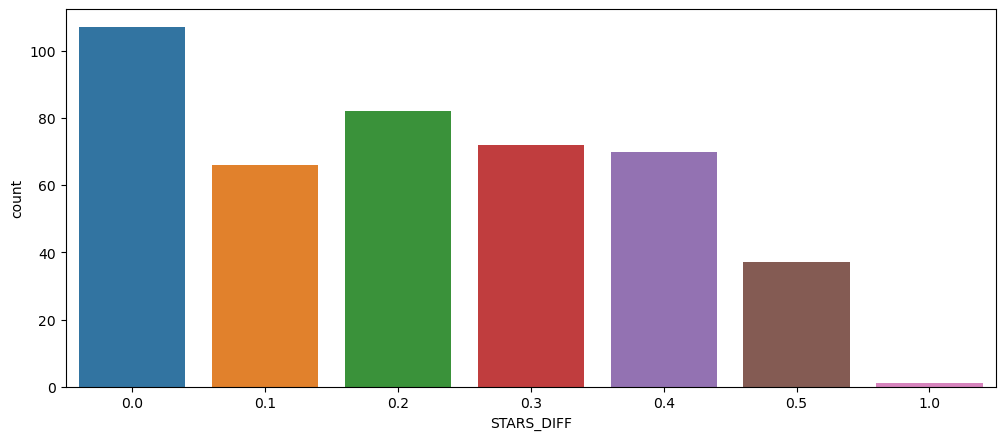

In [18]:
plt.figure(figsize=(12,5),dpi=100)
sns.countplot(data=fandango,x="STARS_DIFF")

In [19]:
fandango.sort_values("STARS_DIFF",ascending=False).head(1)

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


# Comparison of Fandango Ratings to Other Sites
### Let's now compare the scores from Fandango to other movies sites.

In [20]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [21]:
all_sites.head()


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [22]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [23]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


# Rotten Tomatoes
### Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews.

(0.0, 100.0)

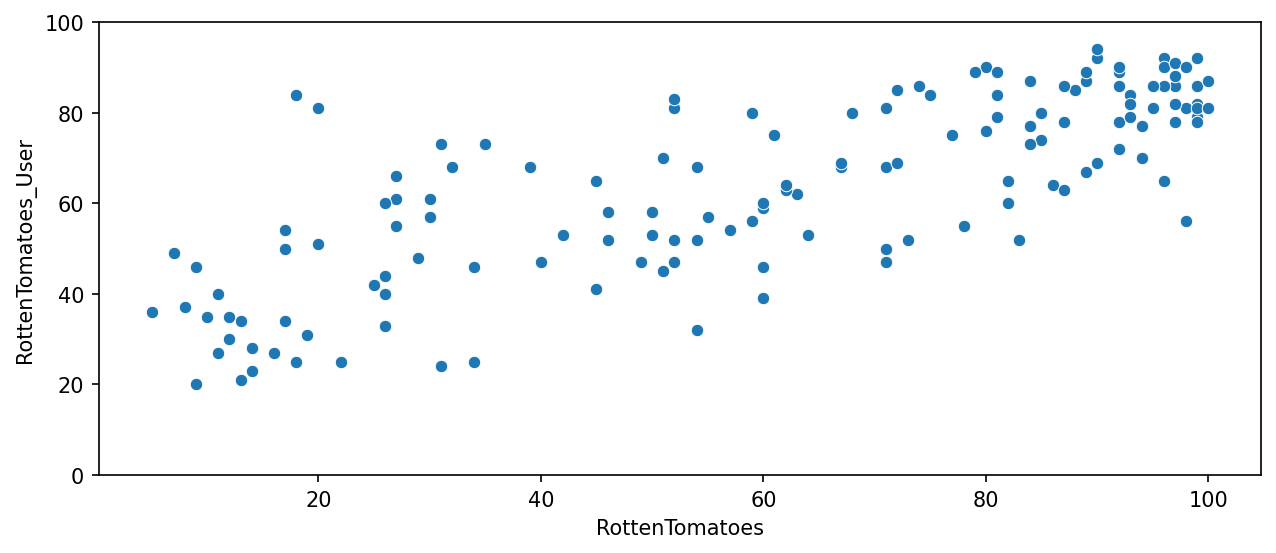

In [24]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x="RottenTomatoes",y="RottenTomatoes_User")
plt.ylim(0,100)

## Creating a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. 

In [25]:
all_sites["Rotten_diff"] = all_sites["RottenTomatoes"] - all_sites["RottenTomatoes_User"]

In [26]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


In [27]:
abs(all_sites["Rotten_diff"]).mean()

15.095890410958905

### Ploting the distribution of the differences between RT Critics Score and RT User Score.

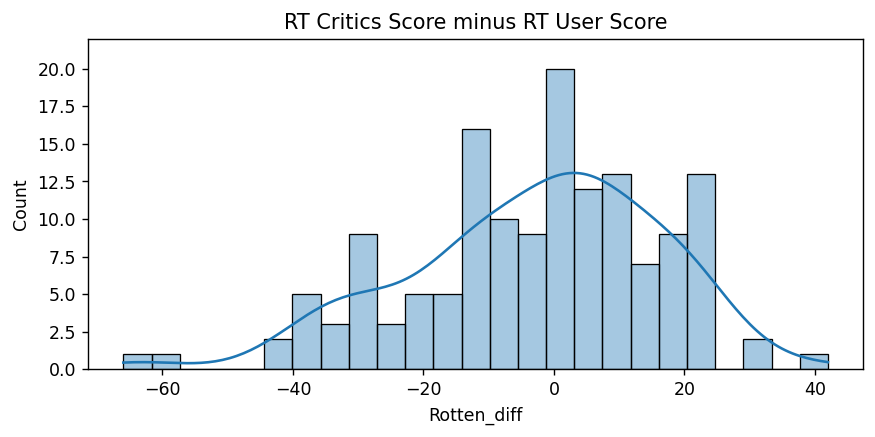

In [93]:

plt.figure(figsize=(8,3.5),dpi=125)
sns.histplot(data=all_sites,x="Rotten_diff",kde=True,bins=25,alpha=0.4,lw=0.75)
plt.ylim(0,22)
plt.title("RT Critics Score minus RT User Score");


### Creating a distribution showing the absolute value difference between Critics and Users on Rotten Tomatoes.

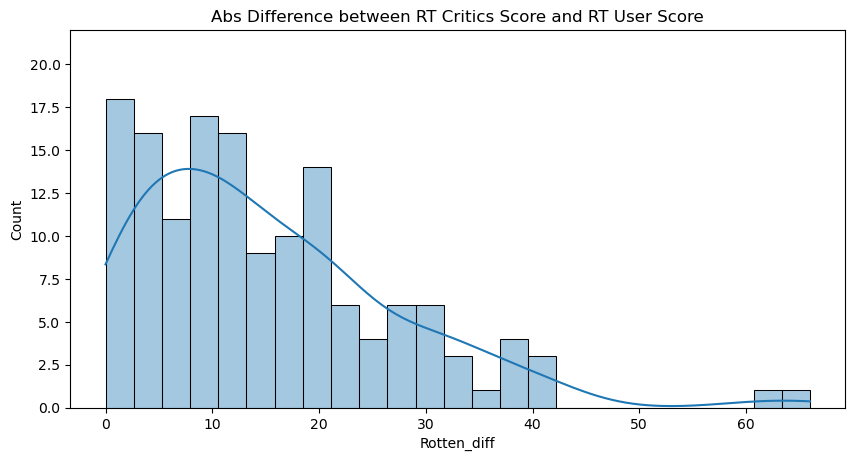

In [28]:
plt.figure(figsize=(10,5),dpi=100)
sns.histplot(x = abs(all_sites["Rotten_diff"]),kde=True,bins=25,alpha=0.4,lw=0.75)
plt.ylim(0,22)
plt.title("Abs Difference between RT Critics Score and RT User Score");

# top 5 movies users rated higher than critics on average:

In [29]:
all_sites.sort_values("Rotten_diff")[["FILM","Rotten_diff"]].head()

,FILM,Rotten_diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


## top 5 movies critics scores higher than users on average.

In [30]:
all_sites.sort_values("Rotten_diff",ascending=False)[["FILM","Rotten_diff"]].head()

,FILM,Rotten_diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


# MetaCritic
### Metacritic also shows an average user rating versus their official displayed rating.
### Creating a scatterplot of the Metacritic Rating versus the Metacritic User rating.

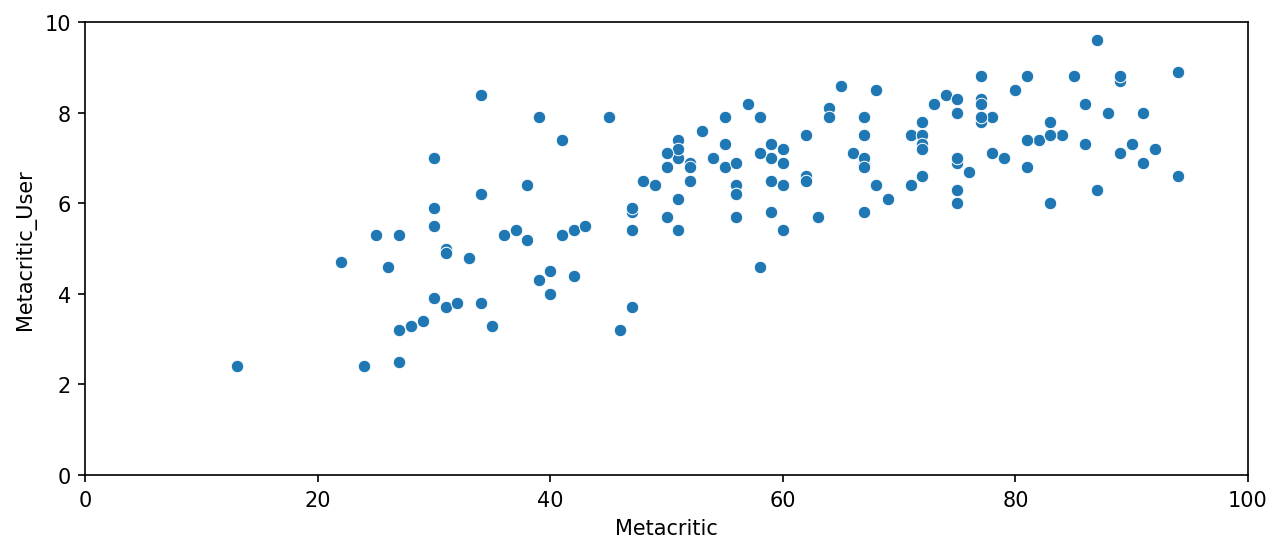

In [97]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x="Metacritic",y="Metacritic_User")
plt.xlim(0,100)
plt.ylim(0,10);

# IMBD
### Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.
### Creating a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.

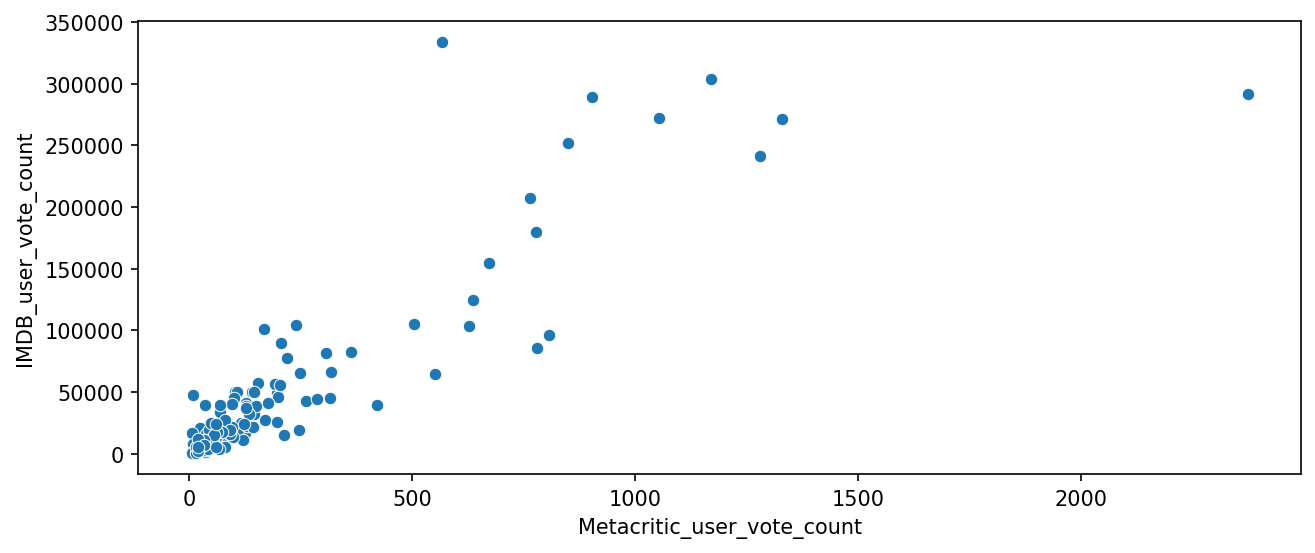

In [31]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x="Metacritic_user_vote_count",y="IMDB_user_vote_count");

In [32]:
all_sites.sort_values('IMDB_user_vote_count').tail(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [33]:
all_sites.sort_values("Metacritic_user_vote_count").tail(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# Fandago Scores vs All Sites
### Combining the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames.

In [34]:
a = pd.merge(fandango,all_sites,how="inner",on="FILM")
a.drop("STARS_DIFF",axis=1,inplace=True)

In [102]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [35]:
a.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


# Normalizing columns to Fandango STARS and RATINGS 0-5
###  RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to normalize these values so they all fall between 0-5 stars and the relationship between reviews stays the same.


In [36]:
a["RT_Norm"] = round(a["RottenTomatoes"]/20,1)
a["RTU_Norm"] = round(a["RottenTomatoes_User"]/20,1)
a["Meta_Norm"] = round(a["Metacritic"]/20,1)
a["Meta_U_Norm"] = round(a["Metacritic_User"]/2,1)
a["IMDB_Norm"] = round(a["IMDB"]/2,1)

In [105]:
a

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9,4.8,4.3,4.3,3.6,3.7


In [37]:
a.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [38]:
norm_scores = a[["STARS","RATING","RT_Norm","RTU_Norm","Meta_Norm","Meta_U_Norm","IMDB_Norm"]]

In [39]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


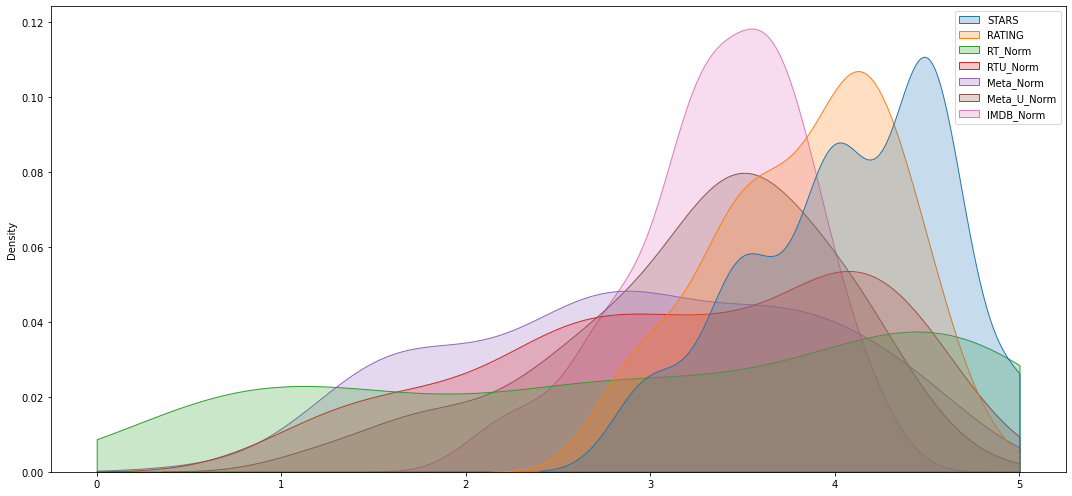

In [109]:
plt.figure(figsize=(15,7))
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True);
plt.tight_layout()

## Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.

### Creating a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.

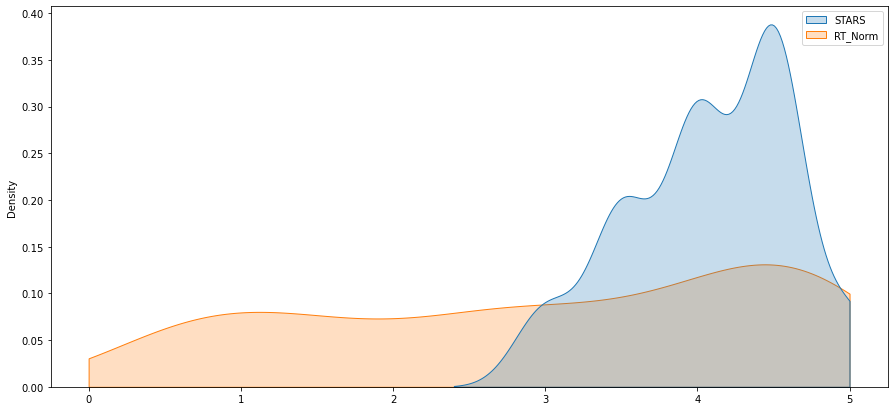

In [40]:
plt.figure(figsize=(15,7))
sns.kdeplot(data=norm_scores[["STARS","RT_Norm"]],clip=[0,5],shade=True);

# Creating a histplot comparing all normalized scores.

<AxesSubplot:ylabel='Count'>

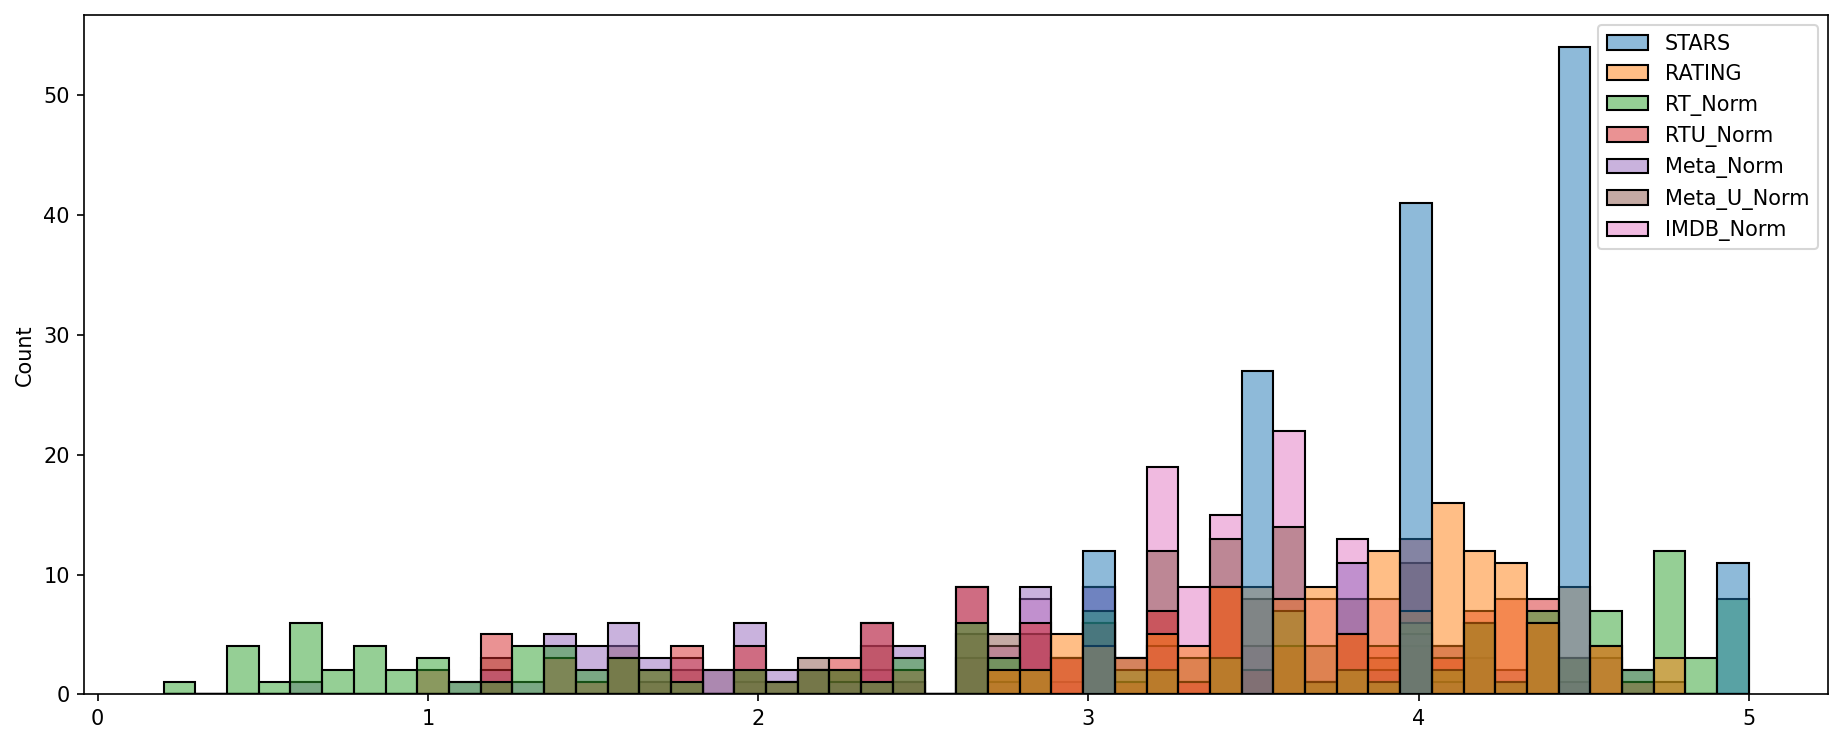

In [41]:
plt.figure(figsize=(15,6),dpi=150)
sns.histplot(data=norm_scores,bins=50)


# How are the worst movies rated across all platforms?
### Create a clustermap visualization of all normalized scores. 

<Figure size 1440x720 with 0 Axes>

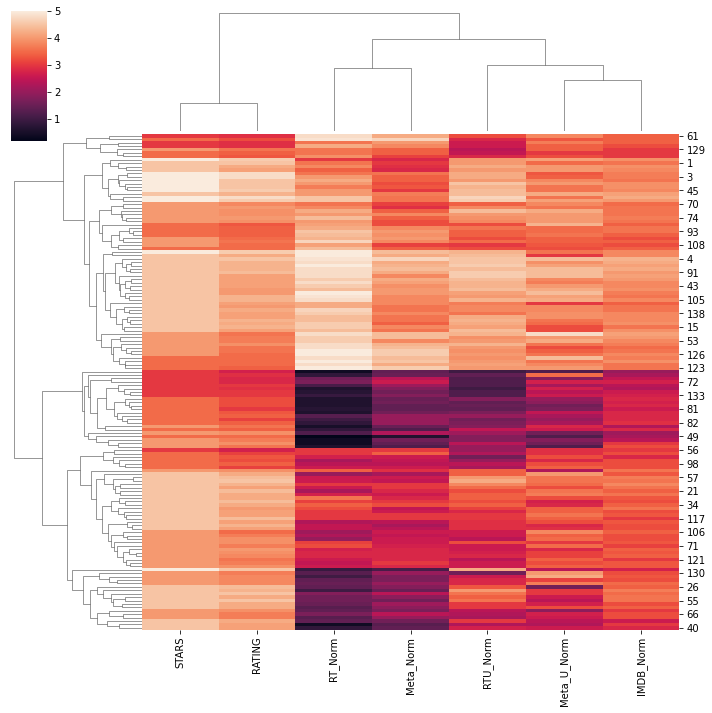

In [42]:
plt.figure(figsize=(20,10))
sns.clustermap(norm_scores)


In [43]:
norm_films = a[["STARS","RATING","RT_Norm","RTU_Norm","Meta_Norm","Meta_U_Norm","IMDB_Norm","FILM"]]

In [44]:
worst_ten_movies = norm_films.nsmallest(10,"RT_Norm")
worst_ten_movies.nsmallest(10,"RT_Norm")

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


### Visualization the distribution of ratings across all sites for the top 10 worst movies.

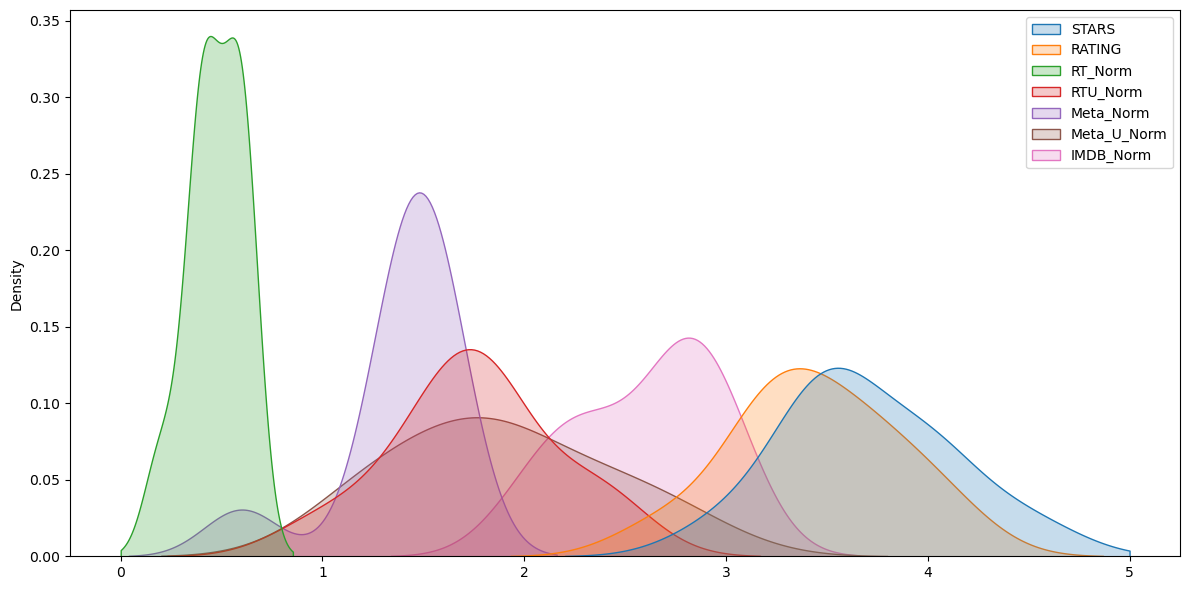

In [45]:
plt.figure(figsize=(12,6),dpi=100)
sns.kdeplot(data=worst_ten_movies,shade=True,clip=[0,5])
plt.tight_layout()

In [46]:
worst_ten_movies.iloc[1]

STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                 3.0
FILM           Taken 3 (2015)
Name: 25, dtype: object

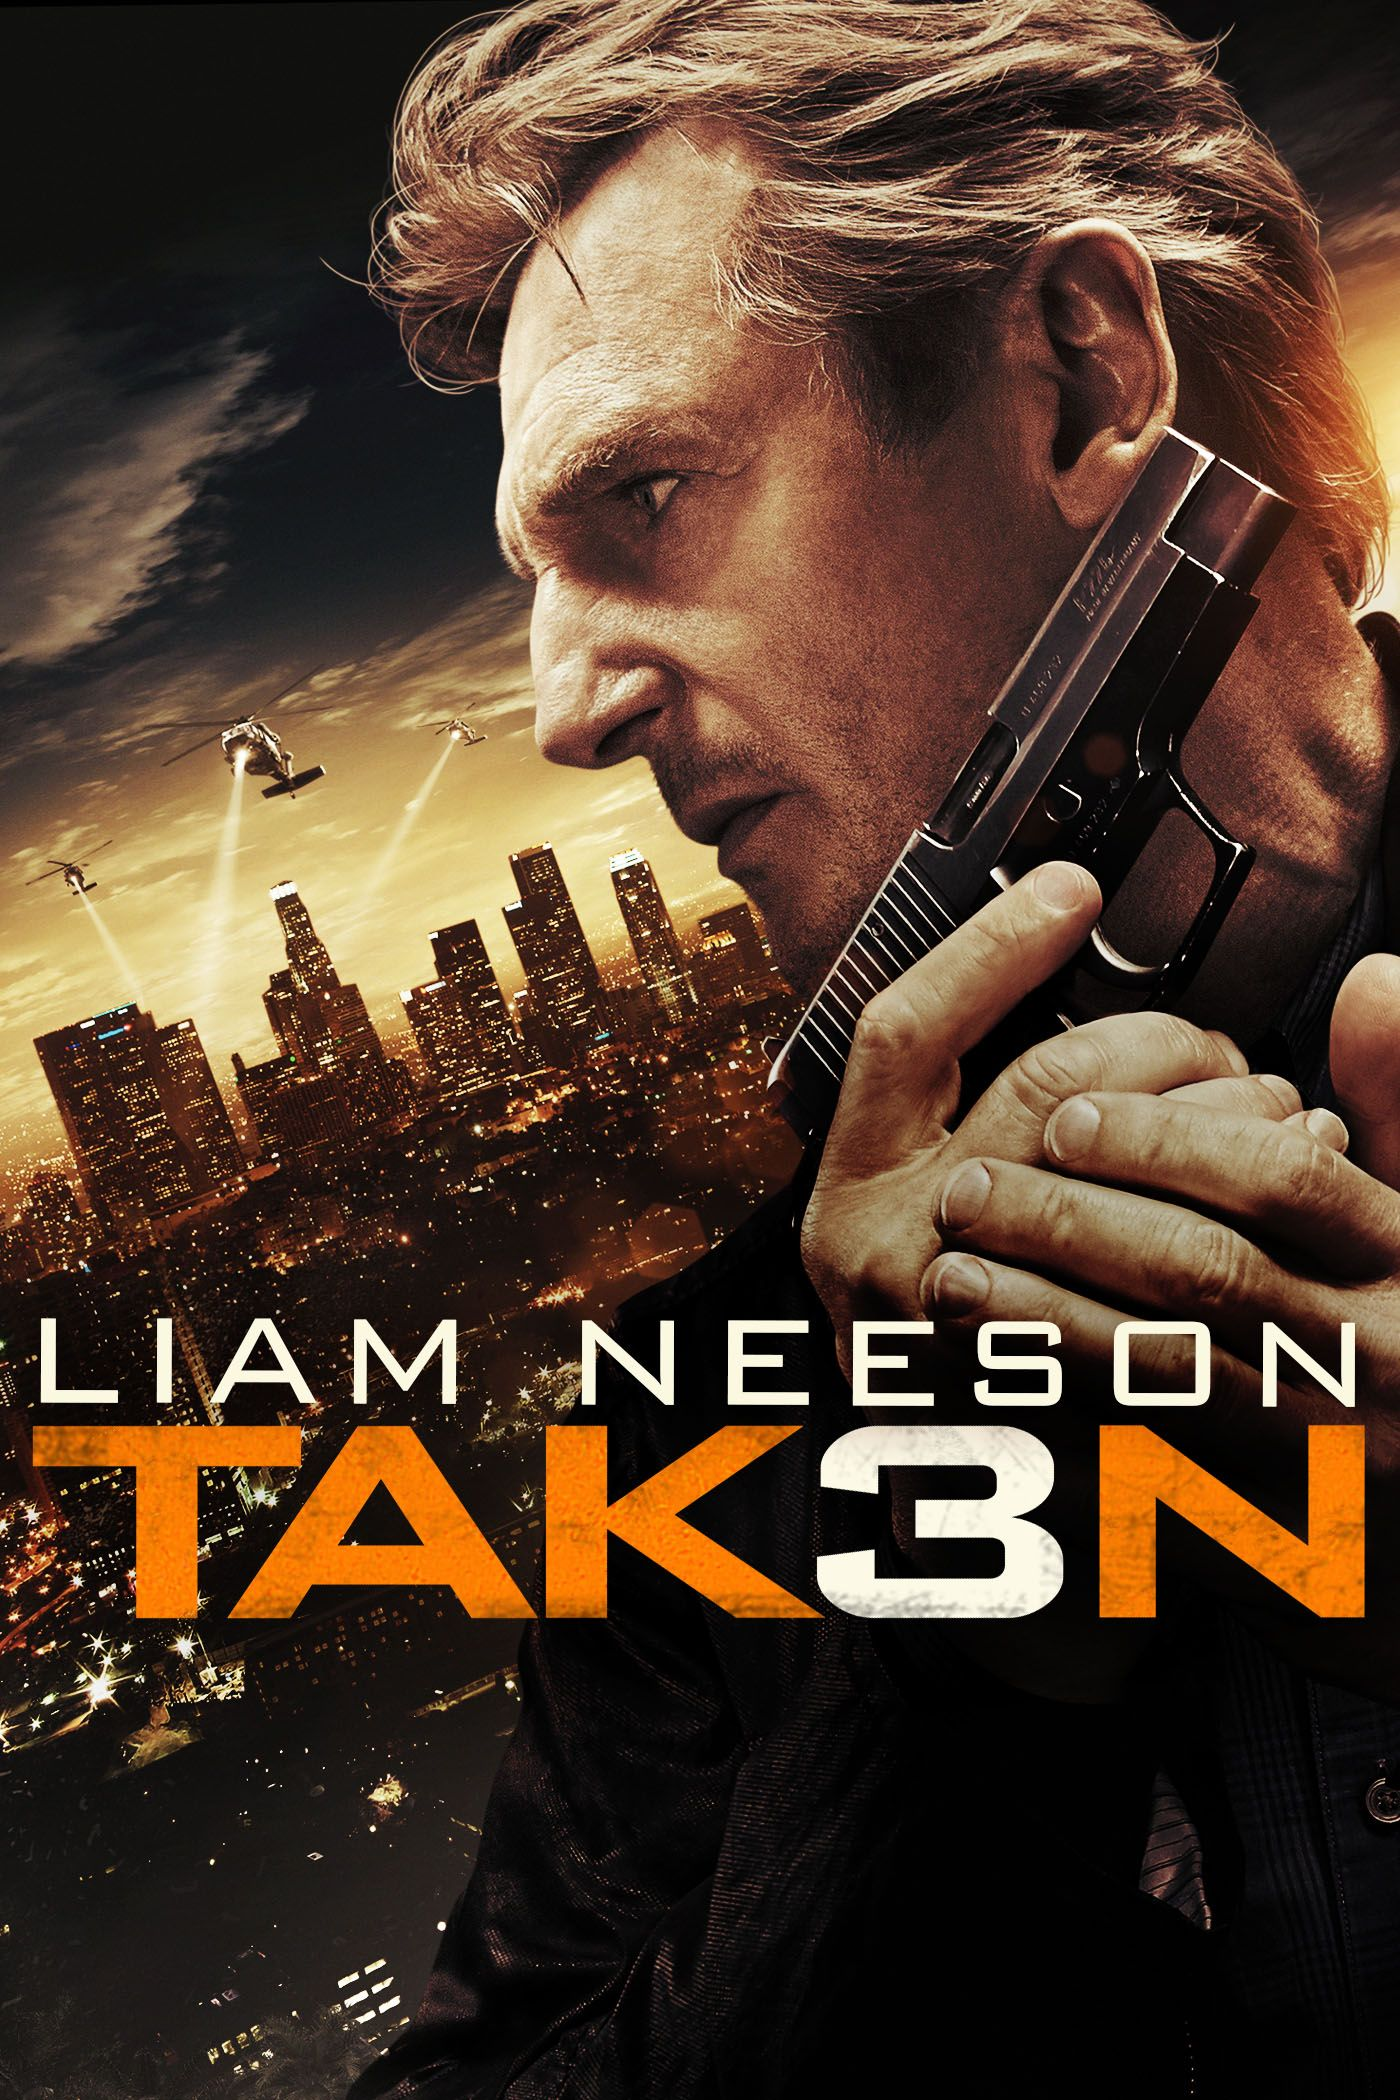
### Final thoughts: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, Taken 3!. Fandango is displaying 4.5 stars on their site for a film with an average rating of 1.86 across the other platforms!

In [53]:
0.4+2.3+1.3+2.3+3

9.3

## Other Websites Average Rating

In [54]:
9.3/5

1.86